##Libraries :

In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Remove Warning :

In [514]:
import warnings
warnings.simplefilter("ignore")

##Dataset :

In [515]:
df = pd.read_csv('/content/mymoviedb.csv',lineterminator = '\n')
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


##Data Exploration

In [516]:
pd.set_option("display.max_columns",None)

In [517]:
df.shape

(9827, 9)

In [518]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


##Duplicates and missing values


In [519]:
df.duplicated().sum()

0

In [520]:
df.isnull().sum().sort_values(ascending=False)

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

##Data cleaning

Converting the movies dates to years

In [521]:
df["Release_Date"]=pd.to_datetime(df["Release_Date"],format='%Y-%m-%d')
df["Year"]=df["Release_Date"].dt.strftime('%Y')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021
...,...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,1973
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,2020
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,2016
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021


drop useless columns

In [522]:
data=df.drop(['Overview','Poster_Url','Release_Date'],axis=1)

cleaning genre column

In [523]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre').reset_index(drop=True)
data['Genre'] = data['Genre'].astype('category')
data

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Year
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,2021
3,The Batman,3827.658,1151,8.1,en,Crime,2022
4,The Batman,3827.658,1151,8.1,en,Mystery,2022
...,...,...,...,...,...,...,...
25788,The United States vs. Billie Holiday,13.354,152,6.7,en,Drama,2021
25789,The United States vs. Billie Holiday,13.354,152,6.7,en,History,2021
25790,Threads,13.354,186,7.8,en,War,1984
25791,Threads,13.354,186,7.8,en,Drama,1984


cleaning language column

In [524]:
data['Original_Language'].value_counts()

en    20019
ja     2025
fr      692
es      659
ko      420
zh      364
cn      299
it      251
ru      229
de      198
pt       72
da       63
no       62
hi       61
sv       58
nl       46
th       45
pl       37
id       35
tr       27
te       15
tl       13
sr       13
fi       12
el        9
cs        8
hu        8
uk        7
is        6
fa        6
ta        5
ro        4
he        4
ar        4
ml        3
eu        3
nb        2
bn        2
ms        2
et        2
ca        1
la        1
lv        1
Name: Original_Language, dtype: int64

In [525]:
other = [x for x in data['Original_Language'].unique()]
other.remove('en')
other.remove('ja')
other.remove('fr')
other.remove('es')
other.remove('ko')
other.remove('zh')
other.remove('cn')
other.remove('it')
other.remove('ru')
other.remove('de')
print(other)

['hi', 'th', 'tr', 'pt', 'ml', 'pl', 'fi', 'no', 'da', 'id', 'sv', 'nl', 'te', 'sr', 'is', 'ro', 'tl', 'fa', 'uk', 'nb', 'eu', 'lv', 'ar', 'el', 'cs', 'ms', 'bn', 'ca', 'la', 'ta', 'hu', 'he', 'et']


In [526]:
data['Original_Language']=data['Original_Language'].replace(other,'Other')

In [527]:
data['Original_Language']=data['Original_Language'].replace(['en'],'English')
data['Original_Language']=data['Original_Language'].replace(['ja'],'Japanese')
data['Original_Language']=data['Original_Language'].replace(['fr'],'French')
data['Original_Language']=data['Original_Language'].replace(['es'],'Spanish')
data['Original_Language']=data['Original_Language'].replace(['ko'],'Korean')
data['Original_Language']=data['Original_Language'].replace(['zh','cn'],'Chinese')
data['Original_Language']=data['Original_Language'].replace(['it'],'Italian')
data['Original_Language']=data['Original_Language'].replace(['ru'],'Russian')
data['Original_Language']=data['Original_Language'].replace(['de'],'German')

In [528]:
data['Original_Language'] = data['Original_Language'].astype('category')

In [529]:
data['Original_Language'].value_counts()

English     20019
Japanese     2025
French        692
Chinese       663
Spanish       659
Other         637
Korean        420
Italian       251
Russian       229
German        198
Name: Original_Language, dtype: int64

##check on the data before visualiztion

In [530]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Title              25793 non-null  object  
 1   Popularity         25793 non-null  float64 
 2   Vote_Count         25793 non-null  int64   
 3   Vote_Average       25793 non-null  float64 
 4   Original_Language  25793 non-null  category
 5   Genre              25793 non-null  category
 6   Year               25793 non-null  int64   
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 1.0+ MB


In [531]:
data.describe()

,Popularity,Vote_Count,Vote_Average,Year
count,25793.000000,25793.000000,25793.000000,25793.000000
mean,42.001288,1504.824526,6.475749,2006.016322
std,113.341050,2743.009590,1.091296,15.490972
min,13.354000,0.000000,0.000000,1902.000000
25%,16.366000,166.000000,6.000000,2000.000000
50%,21.865000,490.000000,6.600000,2011.000000
75%,36.503000,1501.000000,7.200000,2017.000000
max,5083.954000,31077.000000,10.000000,2024.000000


In [532]:
data.nunique()

Title                9513
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      10
Genre                  19
Year                  102
dtype: int64

##Data visualization

**Language column**

In [533]:
sns.set_theme(style="whitegrid")

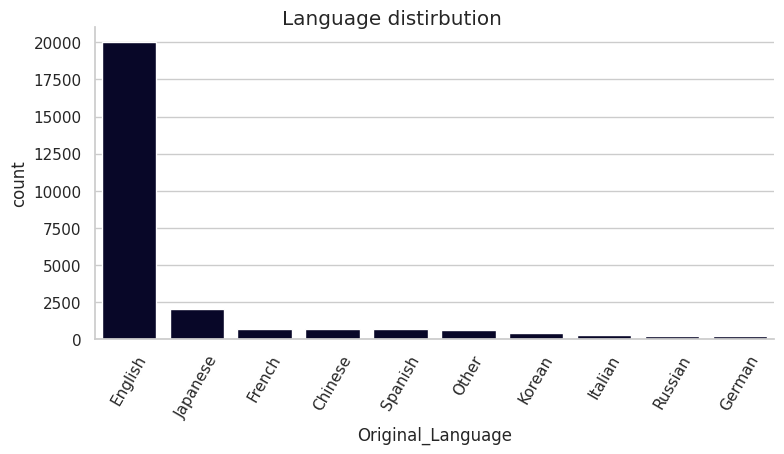

In [534]:
g = sns.catplot(x="Original_Language",data=data,order = data['Original_Language'].value_counts().index,kind="count",color="#03012d",height=4, aspect=2)
plt.xticks(rotation=60)
g.fig.suptitle("Language distirbution",y=1)
plt.show()

Most movies languages are english then japanese

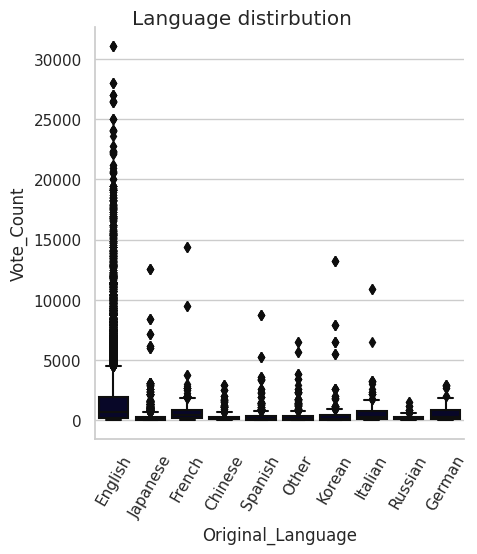

In [535]:
g = sns.catplot(x="Original_Language",y='Vote_Count',order = data['Original_Language'].value_counts().index,data=data,kind="box",color="#03012d")
plt.xticks(rotation=60)
g.fig.suptitle("Language distirbution",y=1)
plt.show()

We have many outliers so i will use the mean not the median

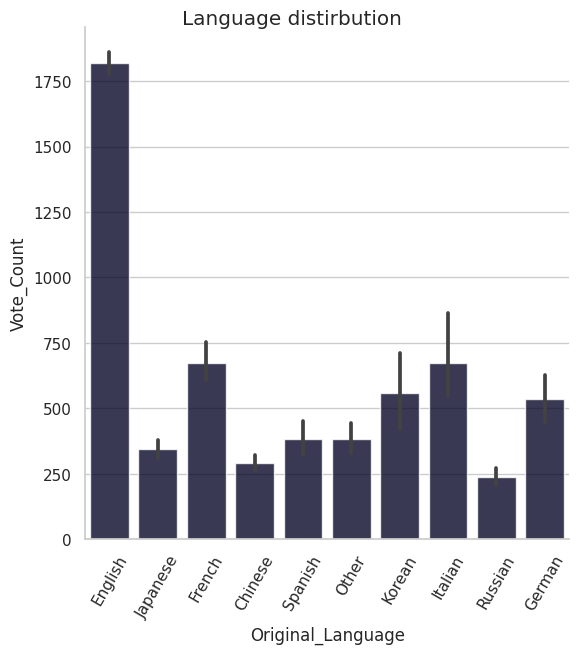

In [536]:
g = sns.catplot(x="Original_Language",y='Vote_Count',order = data['Original_Language'].value_counts().index,data=data,kind="bar",color="#03012d", alpha=.8, height=6)
plt.xticks(rotation=60)
g.fig.suptitle("Language distirbution",y=1)
plt.show()

the movies which had most votes are english ,italian and french

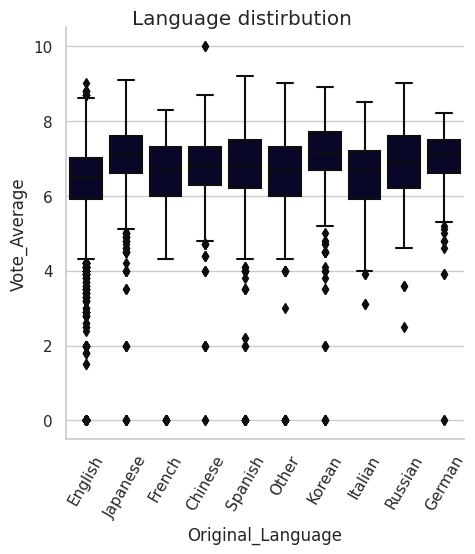

In [537]:
g = sns.catplot(x="Original_Language",y='Vote_Average',order = data['Original_Language'].value_counts().index,data=data,kind="box",color="#03012d")
plt.xticks(rotation=60)
g.fig.suptitle("Language distirbution",y=1)
plt.show()

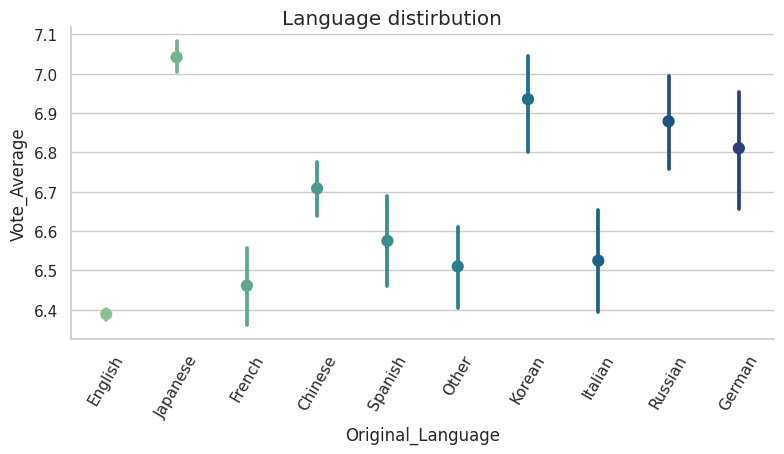

In [538]:
g = sns.catplot(x="Original_Language",y='Vote_Average',order = data['Original_Language'].value_counts().index,data=data,kind="point",palette="crest",height=4, aspect=2)
plt.xticks(rotation=60)
g.fig.suptitle("Language distirbution",y=1)
plt.show()

Average movies rate is between 6.5 and 7 and the japanese are the highest rated

**Genre** **column**


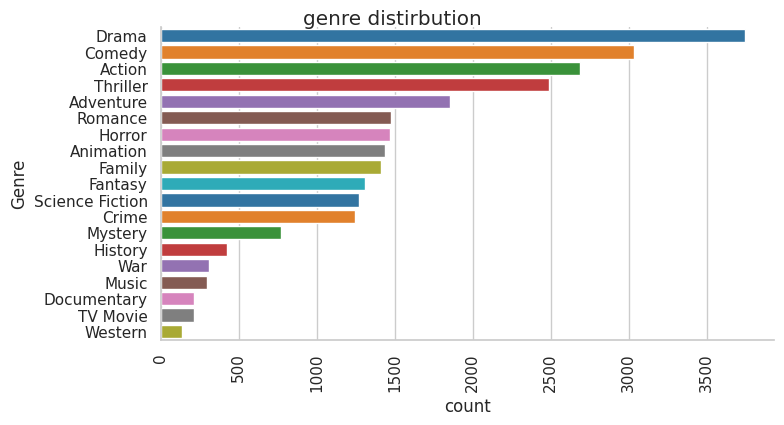

In [539]:
g = sns.catplot(y="Genre",data=data,order = data['Genre'].value_counts().index,kind="count",palette="tab10",height=4, aspect=2)
plt.xticks(rotation=90)
g.fig.suptitle("genre distirbution",y=1)
plt.show()

Most movies genres are Drama,comedy and action

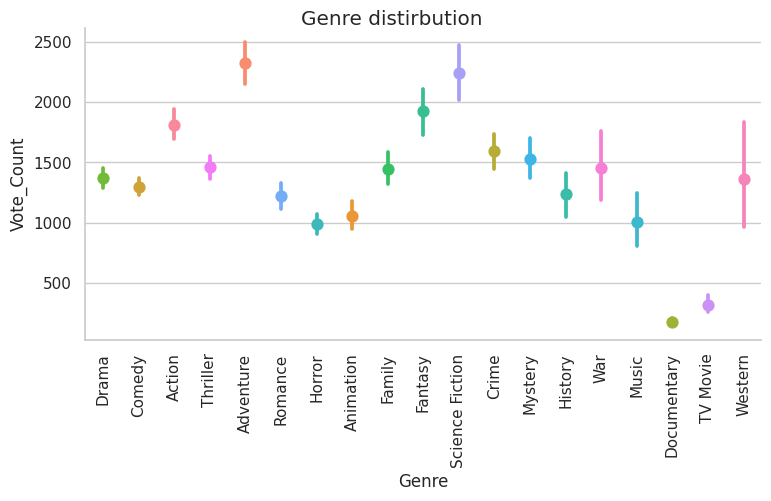

In [540]:
g = sns.catplot(x="Genre",y='Vote_Count',hue='Genre',order = data['Genre'].value_counts().index,data=data,kind="point",height=4, aspect=2)
plt.xticks(rotation=90)
g.fig.suptitle("Genre distirbution",y=1)
plt.show()

 Adventure and Science fiction had the highest votes from all genres

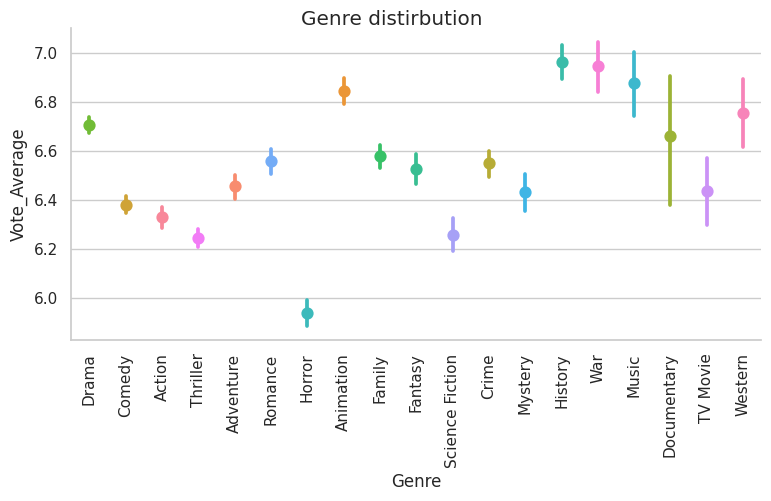

In [541]:
g = sns.catplot(x="Genre",y='Vote_Average',order = data['Genre'].value_counts().index,data=data,kind="point",hue="Genre",height=4, aspect=2)
plt.xticks(rotation=90)
g.fig.suptitle("Genre distirbution",y=1)
plt.show()

History , war and music are the top rated genres

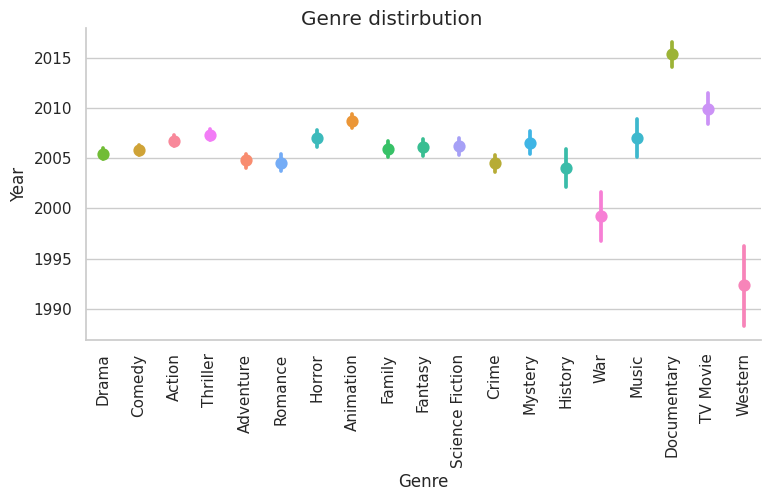

In [542]:
g = sns.catplot(x="Genre",y='Year',order = data['Genre'].value_counts().index,data=data,kind="point",hue="Genre",height=4, aspect=2)
plt.xticks(rotation=90)
g.fig.suptitle("Genre distirbution",y=1)
plt.show()

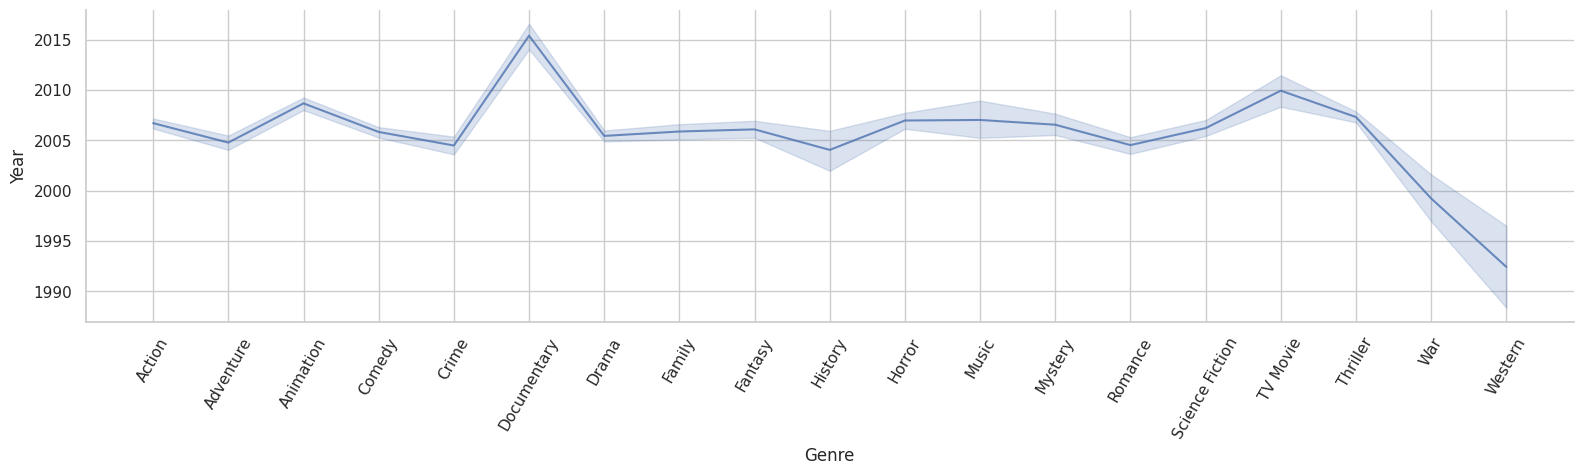

In [543]:
sns.relplot(x="Genre",y='Year' ,kind="line", data=data,alpha=.8, height=4, aspect=4)
plt.xticks(rotation=60)
g.fig.suptitle("Genre distirbution",y=1)
plt.show()

**Year** **column**

<Axes: >

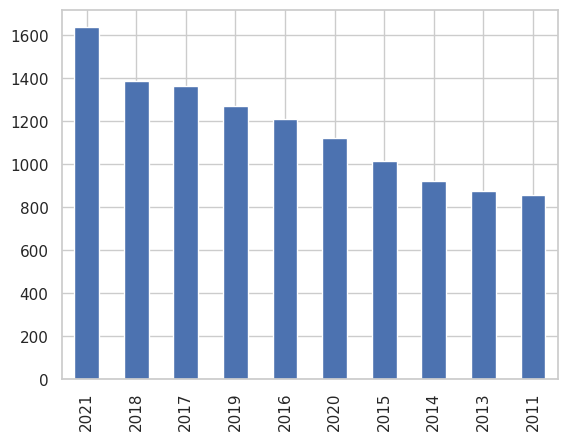

In [558]:
data["Year"].value_counts().head(10).plot(kind='bar')

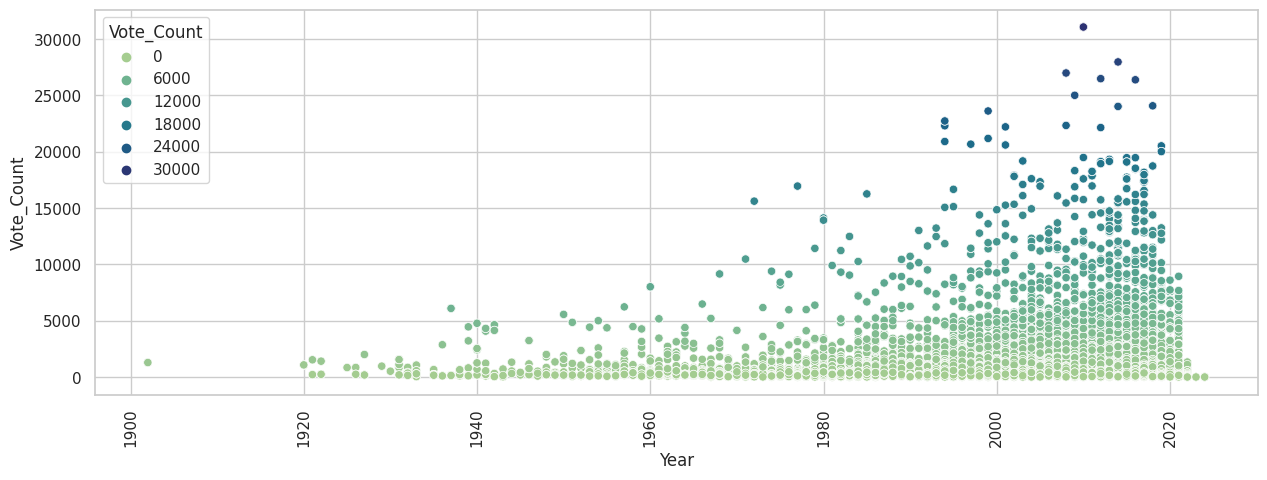

In [545]:
plt.subplots(1,figsize = (15,5))
sns.scatterplot(y='Vote_Count', x="Year",hue='Vote_Count',data=data,palette="crest")
plt.xticks(rotation=90)
g.fig.suptitle("Genre distirbution",y=1)
plt.show()

Most movies with high votes were between 2000 and 2020

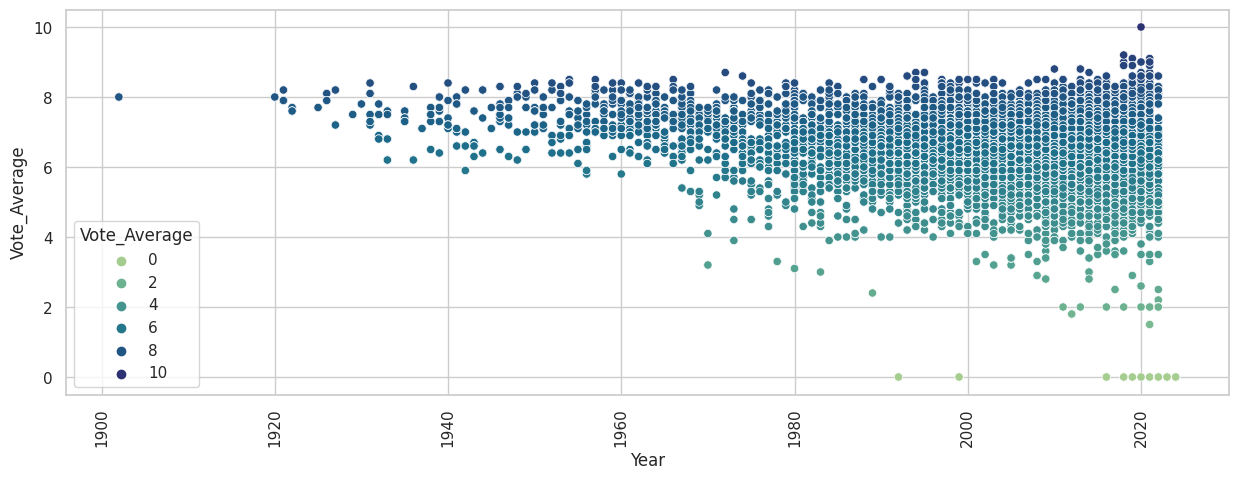

In [546]:
plt.subplots(1,figsize = (15,5))
sns.scatterplot(y='Vote_Average', x="Year",hue='Vote_Average',data=data,palette="crest")
plt.xticks(rotation=90)
plt.show()

the movies rates do not depend on the year

vote count and average


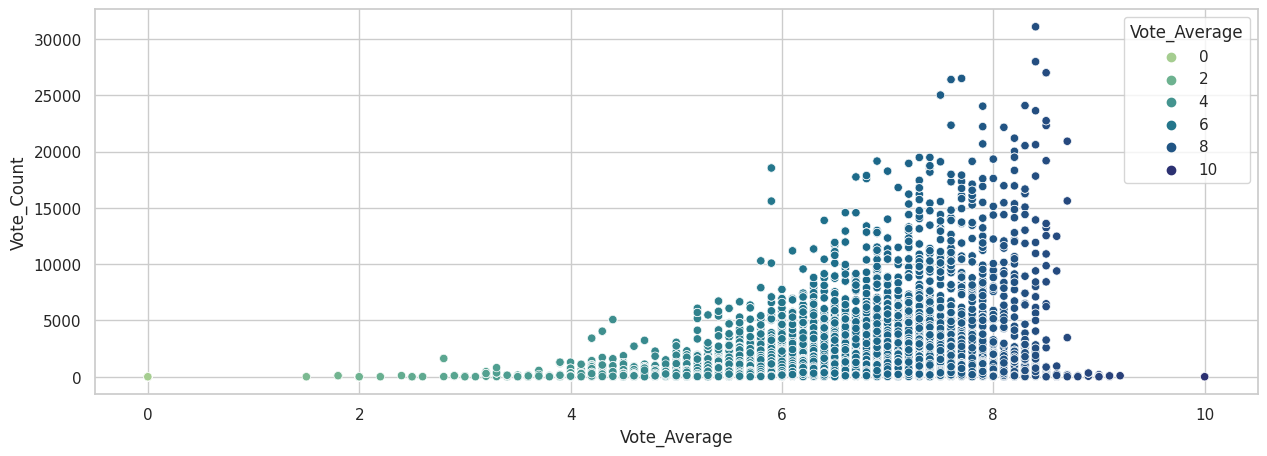

In [547]:
plt.subplots(1,figsize = (15,5))
sns.scatterplot(x='Vote_Average', y="Vote_Count",hue='Vote_Average',data=data,palette="crest")
plt.show()

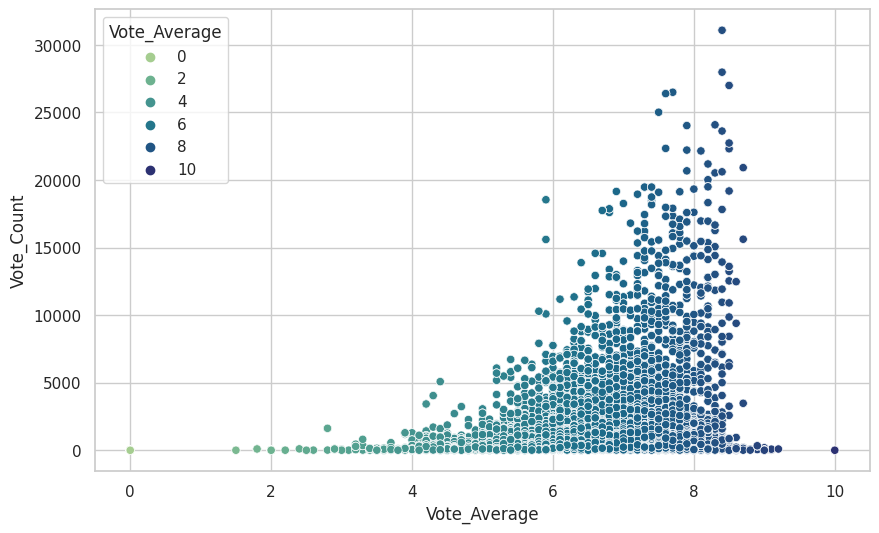

In [548]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x='Vote_Average', y="Vote_Count",hue='Vote_Average',data=data,palette="crest")
plt.show()

Movies with high votes are usually high rated

In [549]:
corr_m = data[['Vote_Average','Vote_Count','Year', 'Popularity']].dropna().astype('int').corr()
corr_m

,Vote_Average,Vote_Count,Year,Popularity
Vote_Average,1.000000,0.239608,-0.155406,0.071641
Vote_Count,0.239608,1.000000,0.018313,0.146374
Year,-0.155406,0.018313,1.000000,0.132695
Popularity,0.071641,0.146374,0.132695,1.000000


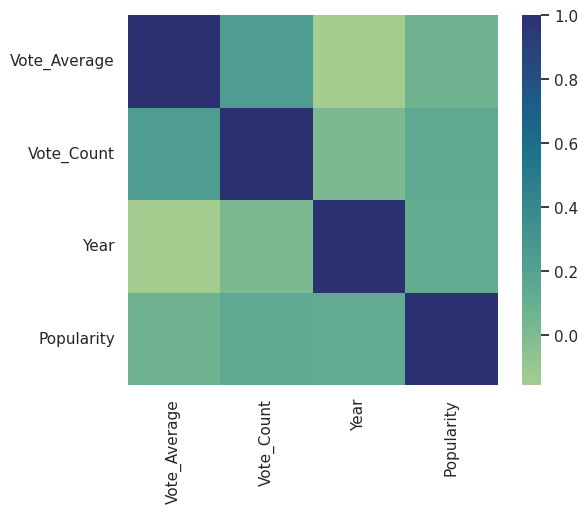

In [550]:
sns.heatmap(corr_m, square = True, cmap = 'crest')

plt.show()

Top rated movies

In [551]:
n=5000
m=8.5
movies=data[['Title','Vote_Average','Vote_Count','Year','Popularity']]
movies.drop_duplicates(inplace=True)
movies.sort_values('Vote_Average',ascending=False,inplace=True)
result = movies[movies['Vote_Count'] >= n]
new_result=result [result ['Vote_Average'] >= m]
new_result.reset_index(inplace = True, drop = True)
new_result

,Title,Vote_Average,Vote_Count,Year,Popularity
0,The Godfather,8.7,15614,1972,93.136
1,The Shawshank Redemption,8.7,20911,1994,87.669
2,The Godfather: Part II,8.6,9393,1974,65.324
3,Schindler's List,8.6,12474,1993,55.225
4,Parasite,8.5,13240,2019,108.442
5,Spirited Away,8.5,12531,2001,104.215
6,Life Is Beautiful,8.5,10903,1997,60.184
7,Your Name.,8.5,8426,2016,155.483
8,The Dark Knight,8.5,26994,2008,173.923
9,The Green Mile,8.5,13604,1999,81.142


i created a new data frame with the top rated movies based on vote count and vote average

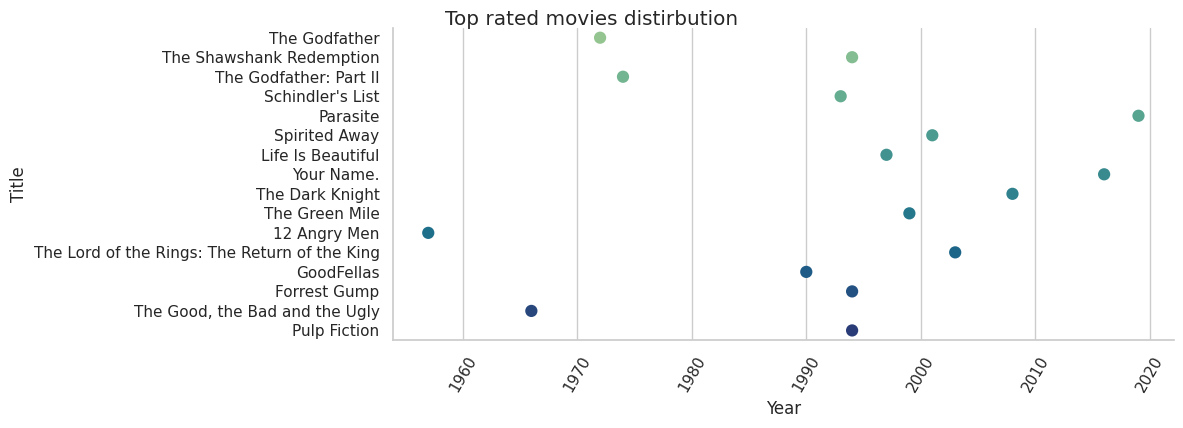

In [552]:
g = sns.catplot(y="Title",x='Year',data=new_result,kind="point",palette="crest",height=4, aspect=3)
plt.xticks(rotation=60)
g.fig.suptitle("Top rated movies distirbution",y=1)
plt.show()

the most of the top rated movies are released before 2000

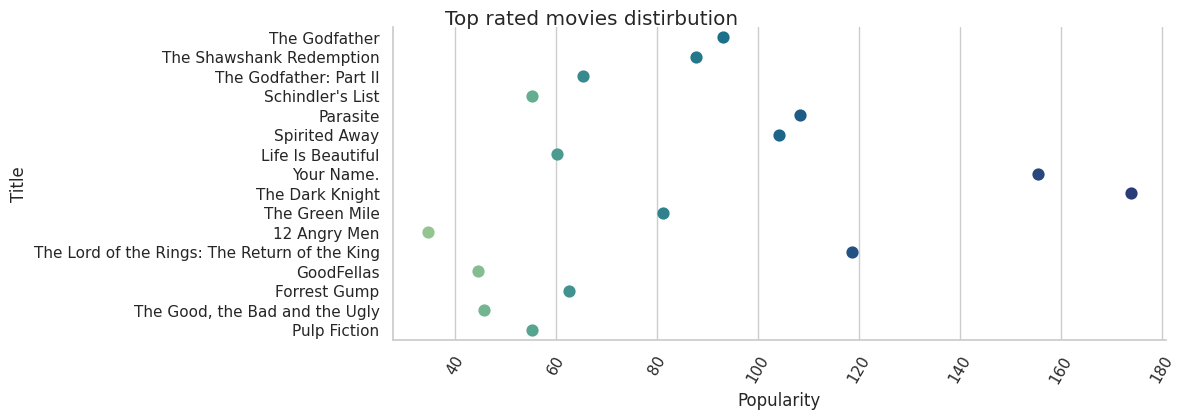

In [553]:
g = sns.catplot(y="Title",x='Popularity',hue='Popularity',data=new_result,kind="point",palette="crest",height=4, aspect=3)
plt.xticks(rotation=60)
g.fig.suptitle("Top rated movies distirbution",y=1)
plt.show()

this plot shows the popularity of the top rated movies now

**Popularity**

In [554]:
m=1500
movies=data[['Title','Vote_Average','Vote_Count','Year','Popularity']]
movies.drop_duplicates(inplace=True)
new_result=movies [movies ['Popularity'] >= m]
new_result.reset_index(inplace = True, drop = True)
new_result

,Title,Vote_Average,Vote_Count,Year,Popularity
0,Spider-Man: No Way Home,8.3,8940,2021,5083.954
1,The Batman,8.1,1151,2022,3827.658
2,No Exit,6.3,122,2022,2618.087
3,Encanto,7.7,5076,2021,2402.201
4,The King's Man,7.0,1793,2021,1895.511
5,The Commando,6.6,33,2022,1750.484
6,Scream,6.8,821,2022,1675.161
7,Kimi,6.3,206,2022,1601.782
8,Fistful of Vengeance,5.3,114,2022,1594.013
9,Eternals,7.2,4726,2021,1537.406


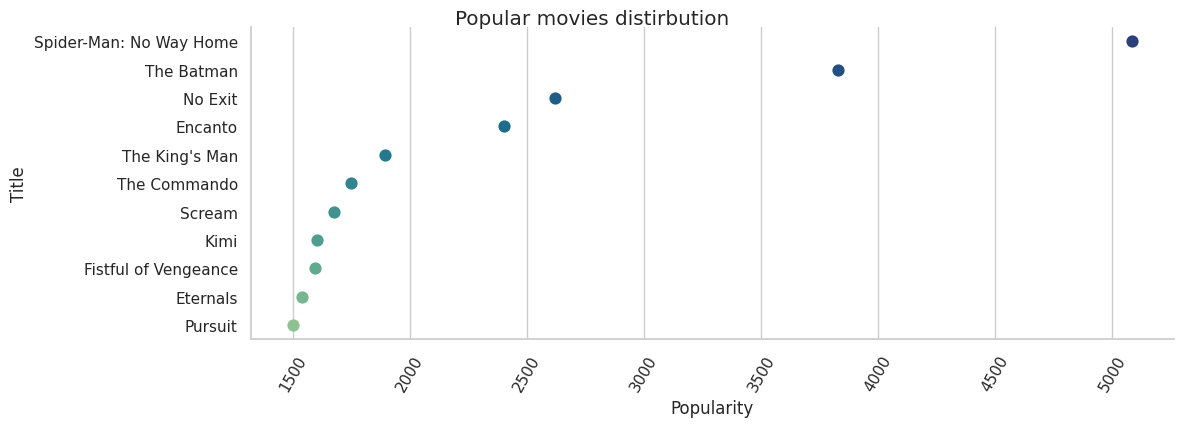

In [555]:
g = sns.catplot(y="Title",x='Popularity',hue='Popularity',data=new_result,kind="point",palette="crest",height=4, aspect=3)
plt.xticks(rotation=60)
g.fig.suptitle("Popular movies distirbution",y=1)
plt.show()

In [556]:
m=13.364
movies=data[['Title','Vote_Average','Vote_Count','Year','Popularity']]
movies.drop_duplicates(inplace=True)
new_result=movies [movies ['Popularity'] < m]
new_result.reset_index(inplace = True, drop = True)
new_result

,Title,Vote_Average,Vote_Count,Year,Popularity
0,I'm in Love With My Little Sister,5.7,9,2005,13.360
1,All Is Lost,6.6,1319,2013,13.359
2,Amateur Porn Star Killer 2,5.4,14,2008,13.359
3,Unlawful Entry,6.1,199,1992,13.358
4,The Little Prince,6.6,89,1974,13.357
5,Badlands,7.6,896,1973,13.357
6,Violent Delights,3.5,8,2020,13.356
7,The Offering,5.0,94,2016,13.355
8,The United States vs. Billie Holiday,6.7,152,2021,13.354
9,Threads,7.8,186,1984,13.354


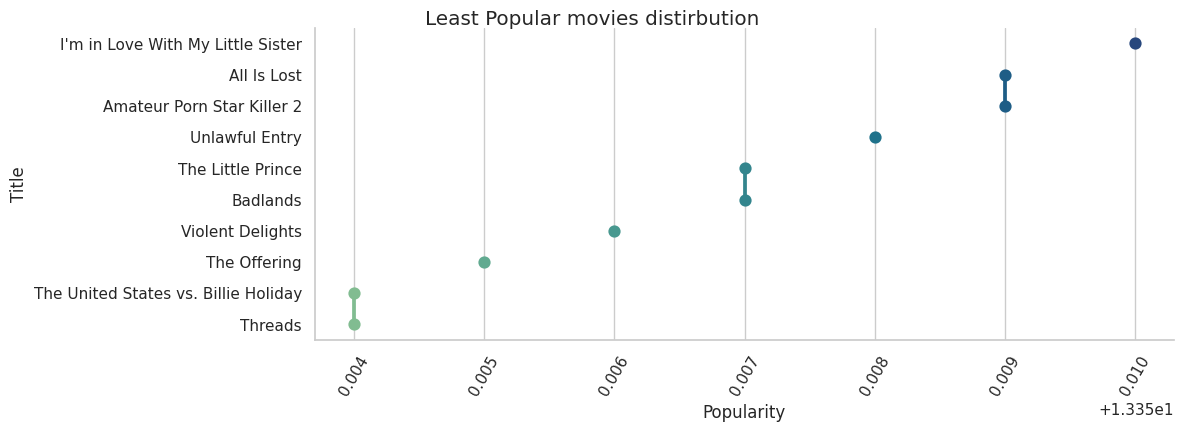

In [557]:
g = sns.catplot(y="Title",x='Popularity',hue='Popularity',data=new_result,kind="point",palette="crest",height=4, aspect=3)
plt.xticks(rotation=60)
g.fig.suptitle("Least Popular movies distirbution",y=1)
plt.show()

* Most movies languages are English then Japanese
* The movie with the highest popularity rate is: Spider-Man: No Way Home
* The movies with the Lowest popularity rate are: Threads and The United States vs. Billie Holiday
* The top rated movie of all time is The Godfather
* The most popular genre of the movies is: Adventure
* The year with the largest film production is: 2021
* The most genre of films is: Drama
* The movie genre with the hiest rate is: History